# K Nearest Neighbors

## Patterns and Relationships


In [1]:
# We'll start by importing the usual suspects
import pandas as pd #for data manipulation
import numpy as np #for numerical computations
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns # his will run on top of matplotlib to give us some visulalizations

In [2]:
# loading in the dataset as a data frame
df = pd.read_csv("default.csv")

In [3]:
# check the first records of the dataset
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
# Get a glimpse of the dataset
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


Our dataset has 10000 records and four columns. The median balance is 823.6 and the maximum is 2654.32. The Median income is 34552.64 while the maximum is 73554.23. 

In [5]:
# Get some more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


We can clearly see that our dataset has no null values, otherwise we'd have to deal with them first. 

## Visualizing the default classes

In [92]:
defaulters = df.groupby('default')['student'].count().reset_index()


In [93]:
defaulters

,default,student
0,No,9667
1,Yes,333


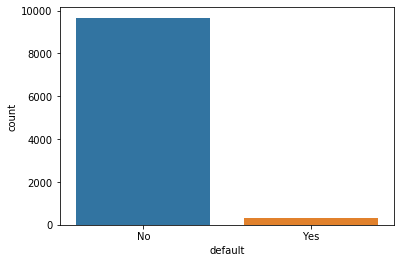

In [8]:
sns.countplot(df["default"])

From the above visualization we can see that most the data points in the daatset fall NO default class

## Visualization of Students

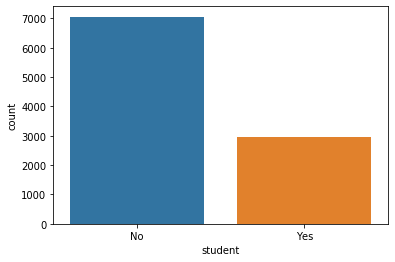

In [9]:
sns.countplot(df['student'])

We see that most of the datapoints are not students

Next, we can Seaborn's pairplot to get a quick visualization of the dataset. 

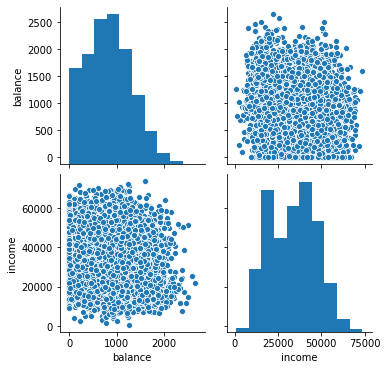

In [10]:
sns.pairplot(df)

## Distribution of the data & Checking for Outliers

let's check the distribution of the data using histogram and boxplots

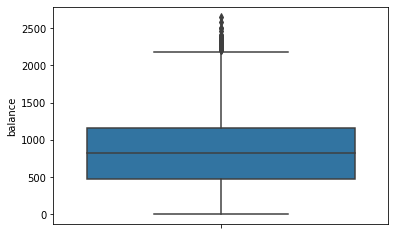

In [11]:
sns.boxplot(y=df["balance"])


In [12]:
q1_income, q3_income= np.percentile(df['income'],[25,75])

In [13]:
q1_balance, q3_balance= np.percentile(df['balance'],[25,75])

In [14]:
q1_income, q3_income

(21340.462905, 43807.729275)

In [15]:
iqr_income = q3_income - q1_income

In [16]:
iqr_income.round(2)

22467.27

In [17]:
q1_balance, q3_balance

(481.73110505, 1166.30838675)

In [18]:
iqr_balance = q3_balance - q1_balance

In [19]:
iqr_balance

684.5772817

In [81]:
lower_bound_income = q1_income - (1.5 * iqr_income)
upper_bound_income = q3_income + (1.5 * iqr_income)

In [87]:
lower_bound_income, upper_bound_income

(-12360.436649999996, 77508.62883)

In [82]:
lower_bound_balance = q1_balance - (1.5 * iqr_balance)
upper_bound_balance = q3_balance + (1.5 * iqr_balance)

In [83]:
lower_bound_balance, upper_bound_balance

(-545.1348175, 2193.1743093)

In [91]:
df[df['balance'] > 2193.1743093].head()

,default,student,balance,income,bal_income_ratio
173,Yes,Yes,2205.799521,14271.492250,6.469986
1136,Yes,No,2499.016750,51504.293960,20.609823
1160,Yes,Yes,2502.684931,14947.519750,5.972593
1359,Yes,No,2220.966201,40725.096210,18.336657
1502,Yes,Yes,2332.878254,11770.234120,5.045370


In [90]:
df[df['balance'] > 2193.1743093].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 173 to 9978
Data columns (total 5 columns):
default             31 non-null object
student             31 non-null object
balance             31 non-null float64
income              31 non-null float64
bal_income_ratio    31 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.5+ KB


In [88]:
df[df['income'] > 77508.62883]

,default,student,balance,income,bal_income_ratio


In [25]:
df['balance'].max()

2654.322576

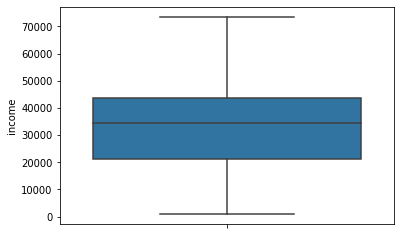

In [26]:
sns.boxplot(y=df["income"])


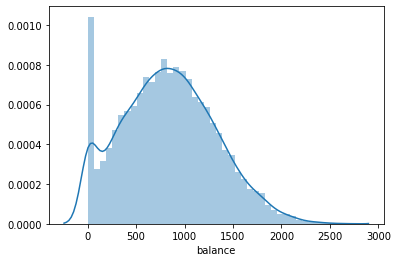

In [27]:
sns.distplot(df["balance"])


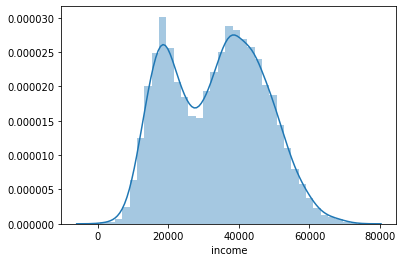

In [28]:
sns.distplot(df["income"])


## What's the balance for the two classes ?

In [29]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure 
#instead of e raised to 
default = df.groupby(['default','student'])['balance'].sum().reset_index() 
# Group by student and sum the balance and reset the index
default.columns = ['Default','student','Balance'] 
# define the columns for the new data frame
default = default.sort_values(by='Balance',ascending=False)
# sort by values and arrange from the largest
default

,Default,student,Balance
0,No,No,5099855.481650
1,No,Yes,2671868.751861
2,Yes,No,345756.477949
3,Yes,Yes,236268.144690


In [30]:
df.groupby('default')['balance'].sum().reset_index()

,default,balance
0,No,7771724.233510
1,Yes,582024.622639


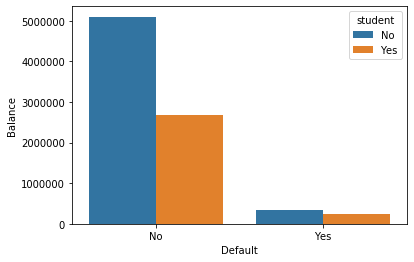

In [31]:
sns.barplot(data=default, x='Default', y='Balance',hue='student')

We see that the total balance the people who haven't defaulted is 7771724 and for those who have defaulted is 582024. We also see that most of the people who haven't defaulted and have a high balance are **No**t students

## What's the income for the two classes ?

In [32]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
default_income = df.groupby(['default','student'])['income'].sum().reset_index() # Group by student and sum the balance and reset the index
default_income.columns = ['Default','Student','Income'] # define the columns for the new data frame
default_income = default_income.sort_values(by='Income',ascending=False) # sort by values and arrange from the largest
default_income

,Default,Student,Income
0,No,No,273955578.919496
1,No,Yes,50528553.847708
2,Yes,No,8368760.438320
3,Yes,Yes,2316925.554049


In [33]:
df.groupby('default')['income'].sum().reset_index()

,default,income
0,No,324484132.767204
1,Yes,10685685.992369


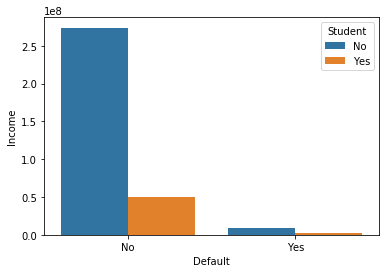

In [34]:
sns.barplot(data=default_income, x='Default', y='Income', hue='Student')

The total income for the people who have defaulted is 324484132 and for 10685686 for those who haven't defaulted.Most of those who have the highest income and haven't defaulted are **No**t student.

## Who has the highest amount of balance. Is it students or non-students?

In [35]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
loan_amount = df.groupby('student')['balance'].sum().reset_index() # Group by student and sum the balance and reset the index
loan_amount.columns = ['Student','Balance'] # define the columns for the new data frame
loan_amount = loan_amount.sort_values(by='Balance',ascending=False) # sort by values and arrange from the largest
loan_amount

,Student,Balance
0,No,5445611.959599
1,Yes,2908136.896551


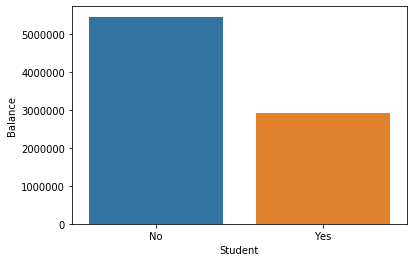

In [36]:
sns.barplot(data=loan_amount, x='Student', y='Balance')

Surprisingly the people with the most balance are not students.

## Who has the highest amount of income. Is it students or non-students?

Let's now perform a similar operation on the income

In [37]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
income_amount = df.groupby('student')['income'].sum().reset_index() # Group by student and sum the income and reset the index
income_amount.columns = ['Student','Income'] # define the columns for the new data frame
income_amount = income_amount.sort_values(by='Income',ascending=False) # sort by values and arrange from the largest
income_amount

,Student,Income
0,No,282324339.357816
1,Yes,52845479.401757


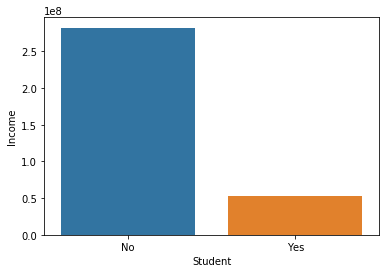

In [38]:
sns.barplot(data=income_amount, x='Student', y='Income')

The people with the most income are not students yet they are the people with the most balance.This could be because the people with most income also have the biggest borrowing muscle because they are more credit worth. 

## Relationship between the income and balance.

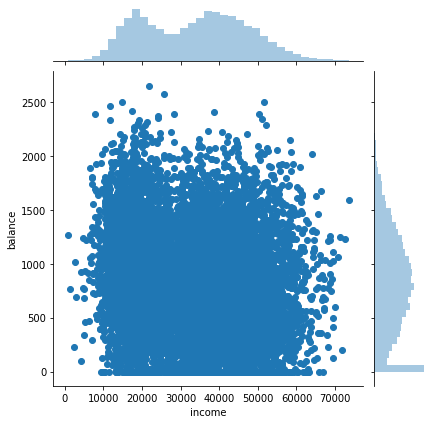

In [39]:
sns.jointplot(data = df, x = df['income'], y = df['balance'])

In [40]:
df['income'].corr(df['balance'])

-0.1522434005865672

In [41]:
import scipy.stats  as stats
stats.pearsonr(df['income'], df['balance'])

(-0.15224340058656724, 6.380440176588157e-53)

We can see that there is a negative correlation of about 15% between the income and the balance. This means that as income increases the balance decreases. The 2-tailed p-value being less that 0.05 also suggest the same thing.

## Relationship Between Defaulting and Being a Student

H0:There is no statistically significant relationship between defaulting and being a student.

H1:There is a statistically significant relationship between defaulting and being a student.

In [105]:
contingency_table = pd.crosstab(
    df['default'],
    df['student'],
)
contingency_table

student,No,Yes
default,,
No,6850,2817
Yes,206,127


In [112]:
contingency_table.iloc[0]

student
No     6850
Yes    2817
Name: No, dtype: int64

In [113]:
contingency_table.iloc[1]

student
No     206
Yes    127
Name: Yes, dtype: int64

In [108]:
from scipy.stats import chi2_contingency

In [114]:
f_obs = np.array([contingency_table.iloc[0].values,contingency_table.iloc[1].values])
f_obs

array([[6850, 2817],
       [ 206,  127]])

In [110]:
chi2, p, dof, ex = chi2_contingency(f_obs)

In [111]:
chi2, p

(12.1166885136231, 0.0004997256756210486)

Our p-value < 0.05 we therefore reject the null hypothesis and conclude that there is a
relationship between the default rate and being a student.

##  Income of both defaulters and non defaulters are the same
Ho The mean income of defaulters and  non defaulters are  are equal.

H1 The mean income of defaulters and  non defaulters are  not are equal.


In [48]:
from scipy.stats import ttest_ind

In [78]:
df[df['default'] == 'Yes'].head(1)

,default,student,balance,income,bal_income_ratio
136,Yes,Yes,1486.998122,17854.397030,12.007007


In [49]:
defaulters = df[df['default'] == 'Yes']['income']

In [79]:
df[df['default'] == 'No'].head(1)

,default,student,balance,income,bal_income_ratio
0,No,No,729.526495,44361.625070,60.808792


In [50]:
non_defaulters = df[df['default'] == 'No']['income']

In [52]:
ttest_ind(defaulters,non_defaulters)

Ttest_indResult(statistic=-1.987338454885802, pvalue=0.046912142143412355)

Since our p value < 0.05 we reject the null hypothesis and conclude that the mean of the defaulters and non-defaulters are not equal.

## Feature Engineering

I would like to see the ratio of the balance and the income.

In [122]:
def divide(x):
    balance,income = x[0],x[1]
    if balance != 0:
        return (income / balance)
    return 0


In [123]:
df['bal_income_ratio'] = df[['balance','income']].apply(divide,axis=1)

In [124]:
df.head()

,default,student,balance,income,bal_income_ratio
0,No,No,729.526495,44361.625070,60.808792
1,No,Yes,817.180407,12106.134700,14.814519
2,No,No,1073.549164,31767.138950,29.590763
3,No,No,529.250605,35704.493940,67.462358
4,No,No,785.655883,38463.495880,48.957179


## Model to predict the Probability of Defaulting

We'll start by importing train_test_split that we'll use to split our dataset into a training and test set

In [56]:
from sklearn.model_selection import train_test_split

Next, we convert the default and student column into dummy variables because our model will only take numerical figures. We also drop the first dummy variable so that we don't fall into the dummy variable trap

In [57]:
feats = ['default','student']

In [58]:
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [59]:
df_final.head()

,balance,income,bal_income_ratio,default_Yes,student_Yes
0,729.526495,44361.625070,60.808792,0,0
1,817.180407,12106.134700,14.814519,0,1
2,1073.549164,31767.138950,29.590763,0,0
3,529.250605,35704.493940,67.462358,0,0
4,785.655883,38463.495880,48.957179,0,0


At this stage we split the dataset into a test and training set,we'll use 70% for training and 30% for testing.

In [61]:
X = df_final.drop(['default_Yes'],axis=1)
y = df_final['default_Yes']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We then scale our dataset since our machine learning model will expect data that has been scaled.

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [64]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model = KNeighborsClassifier()

In [67]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [68]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9696666666666667

We can now use the predict method to make predictions on the test set.

In [69]:
predictions = model.predict(X_test)

In [70]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

We can also predict to get the class probabilities.

In [71]:
predict_probabilities = model.predict_proba(X_test)

In [72]:
predict_probabilities

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Model Documentation

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(confusion_matrix(y_test,predictions))

[[2874   24]
 [  67   35]]


From the 3000 test data points, the model predicted 2874 + 35  as correctly and predicted 24 +67 incorrectly. 2874 are referred to at the True Positives, 24 are the False Negative, 67 are False positive and 35 are the True Negatives.

In [1]:
print(classification_report(y_test, predictions))

NameError: name 'classification_report' is not defined

Happy learning!